# NetWorkX 代码实战 - 图表示

## 2 图表示

In [17]:
import networkx as nx
import numpy as np
nx.__version__

'2.6.3'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc("font",family="SimHei")
plt.rcParams["axes.unicode_minus"]=False

# Specify Chinese font
zhfont1 = mpl.font_manager.FontProperties(fname='C:\Windows\Fonts\simsun.ttc')
 
# Force Matplotlib to recognize SimHei or other Chinese font
mpl.rcParams['font.sans-serif'] = [zhfont1.get_name()]

### 2.1 PageRank节点重要度
针对有向图，若为无向图，则会自动处理为双向图

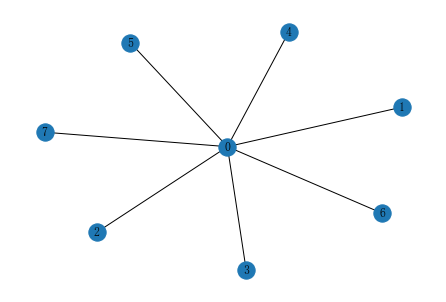

In [3]:
G = nx.star_graph(7)
nx.draw(G,with_labels=True)

In [4]:
pagerank = nx.pagerank(G, alpha=0.8)

In [5]:
pagerank

{0: 0.4583348922684132,
 1: 0.07738072967594098,
 2: 0.07738072967594098,
 3: 0.07738072967594098,
 4: 0.07738072967594098,
 5: 0.07738072967594098,
 6: 0.07738072967594098,
 7: 0.07738072967594098}

### 2.2 NodeDegree节点重要度

In [9]:
G = nx.gnp_random_graph(100,0.02,seed=123)

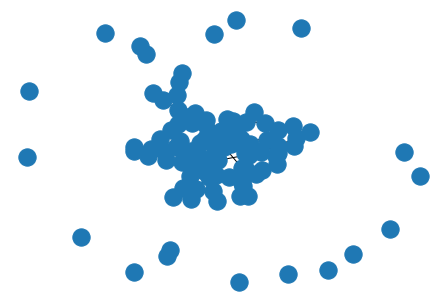

In [10]:
pos = nx.spring_layout(G,seed = 233)
nx.draw(G,pos)

最大连通域子图

In [11]:
Gcc = G.subgraph(sorted(nx.connected_components(G),key=len,reverse=True)[0])

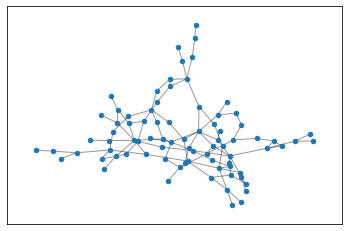

In [12]:
pos = nx.spring_layout(Gcc,seed = 233)

nx.draw_networkx_nodes(Gcc,pos,node_size=20)
nx.draw_networkx_edges(Gcc,pos,alpha=0.4)

![](pic/max.png)

每个节点的连接数

In [13]:
G.degree()

DegreeView({0: 3, 1: 0, 2: 2, 3: 4, 4: 1, 5: 0, 6: 3, 7: 0, 8: 3, 9: 2, 10: 2, 11: 2, 12: 2, 13: 0, 14: 3, 15: 2, 16: 1, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 1, 24: 2, 25: 0, 26: 3, 27: 7, 28: 2, 29: 0, 30: 3, 31: 4, 32: 5, 33: 2, 34: 2, 35: 1, 36: 1, 37: 3, 38: 3, 39: 0, 40: 3, 41: 1, 42: 7, 43: 2, 44: 0, 45: 1, 46: 3, 47: 2, 48: 1, 49: 1, 50: 1, 51: 1, 52: 5, 53: 0, 54: 0, 55: 3, 56: 2, 57: 2, 58: 4, 59: 1, 60: 3, 61: 2, 62: 4, 63: 1, 64: 1, 65: 1, 66: 2, 67: 0, 68: 2, 69: 0, 70: 3, 71: 1, 72: 0, 73: 1, 74: 3, 75: 3, 76: 1, 77: 1, 78: 2, 79: 3, 80: 4, 81: 0, 82: 1, 83: 3, 84: 4, 85: 3, 86: 2, 87: 2, 88: 3, 89: 1, 90: 0, 91: 1, 92: 3, 93: 7, 94: 1, 95: 4, 96: 1, 97: 3, 98: 3, 99: 3})

In [14]:
degree_sequence = sorted((d for n,d in G.degree()),reverse=True)

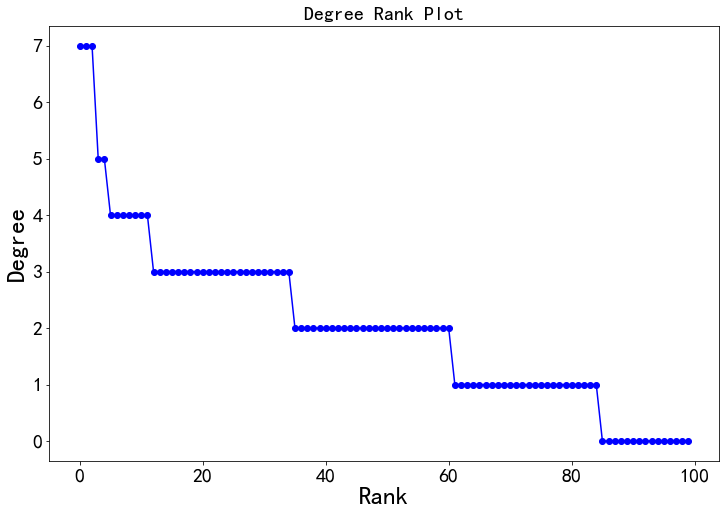

In [16]:
plt.figure(figsize=(12,8))
plt.plot(degree_sequence,'b-',marker='o')
plt.title('Degree Rank Plot',fontsize=20)
plt.ylabel('Degree',fontsize=25)
plt.xlabel('Rank',fontsize=25)
plt.tick_params(labelsize=20)
plt.show()

节点degree直方图

In [18]:
X = np.unique(degree_sequence,return_counts=True)[0]
Y = np.unique(degree_sequence,return_counts=True)[1]

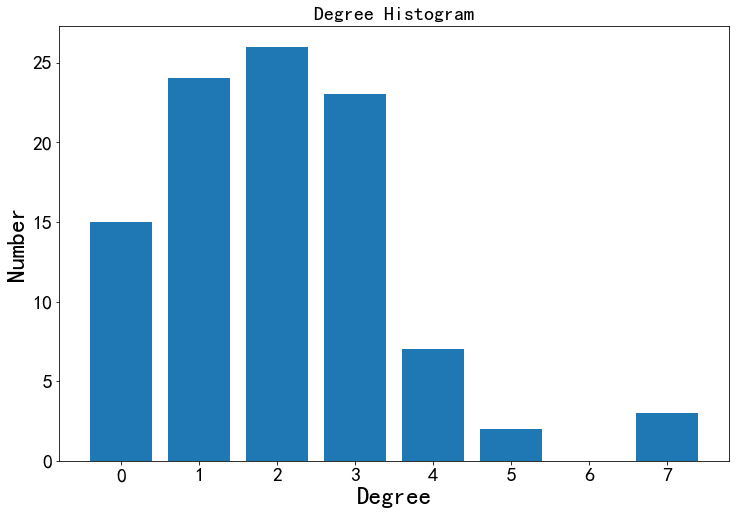

In [19]:
plt.figure(figsize=(12,8))
plt.bar(X,Y)
plt.title('Degree Histogram',fontsize=20)
plt.ylabel('Number',fontsize=25)
plt.xlabel('Degree',fontsize=25)
plt.tick_params(labelsize=20)
plt.show()

### 2.3 棒棒糖图特征分析

In [20]:
G = nx.lollipop_graph(4,7)

可视化

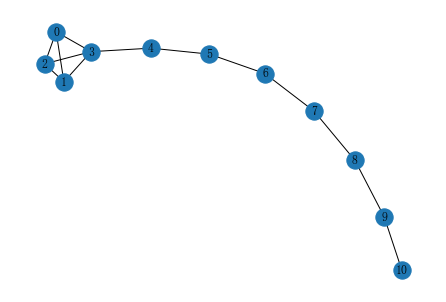

In [21]:
pos = nx.spring_layout(G,seed = 233)
nx.draw(G,pos,with_labels=True)

图数据分析

半径

In [22]:
nx.radius(G)

4

直径

In [23]:
nx.diameter(G)

8

偏心度：每个节点到图中其他节点的最远距离

In [24]:
nx.eccentricity(G)

{0: 8, 1: 8, 2: 8, 3: 7, 4: 6, 5: 5, 6: 4, 7: 5, 8: 6, 9: 7, 10: 8}

中心节点：偏心度与半径相等的节点

In [25]:
nx.center(G)

[6]

外围节点：偏心度与直径相等的节点

In [26]:
nx.periphery(G)

[0, 1, 2, 10]

![](pic/density.png)

density

In [27]:
nx.density(G)

0.23636363636363636

3号节点到图中其它节点的最短距离

In [28]:
node_id = 3
nx.single_source_shortest_path_length(G,node_id)

{3: 0, 0: 1, 1: 1, 2: 1, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6, 10: 7}

每两个节点之间的最短距离

In [29]:
pathlengths = []
for v in G.nodes():
    spl = nx.single_source_shortest_path_length(G,v)
    for p in spl:
        print("{} --> {} 最短距离 {}".format(v,p,spl[p]))
        pathlengths.append(spl[p])

0 --> 0 最短距离 0
0 --> 1 最短距离 1
0 --> 2 最短距离 1
0 --> 3 最短距离 1
0 --> 4 最短距离 2
0 --> 5 最短距离 3
0 --> 6 最短距离 4
0 --> 7 最短距离 5
0 --> 8 最短距离 6
0 --> 9 最短距离 7
0 --> 10 最短距离 8
1 --> 1 最短距离 0
1 --> 0 最短距离 1
1 --> 2 最短距离 1
1 --> 3 最短距离 1
1 --> 4 最短距离 2
1 --> 5 最短距离 3
1 --> 6 最短距离 4
1 --> 7 最短距离 5
1 --> 8 最短距离 6
1 --> 9 最短距离 7
1 --> 10 最短距离 8
2 --> 2 最短距离 0
2 --> 0 最短距离 1
2 --> 1 最短距离 1
2 --> 3 最短距离 1
2 --> 4 最短距离 2
2 --> 5 最短距离 3
2 --> 6 最短距离 4
2 --> 7 最短距离 5
2 --> 8 最短距离 6
2 --> 9 最短距离 7
2 --> 10 最短距离 8
3 --> 3 最短距离 0
3 --> 0 最短距离 1
3 --> 1 最短距离 1
3 --> 2 最短距离 1
3 --> 4 最短距离 1
3 --> 5 最短距离 2
3 --> 6 最短距离 3
3 --> 7 最短距离 4
3 --> 8 最短距离 5
3 --> 9 最短距离 6
3 --> 10 最短距离 7
4 --> 4 最短距离 0
4 --> 3 最短距离 1
4 --> 5 最短距离 1
4 --> 0 最短距离 2
4 --> 1 最短距离 2
4 --> 2 最短距离 2
4 --> 6 最短距离 2
4 --> 7 最短距离 3
4 --> 8 最短距离 4
4 --> 9 最短距离 5
4 --> 10 最短距离 6
5 --> 5 最短距离 0
5 --> 4 最短距离 1
5 --> 6 最短距离 1
5 --> 3 最短距离 2
5 --> 7 最短距离 2
5 --> 0 最短距离 3
5 --> 1 最短距离 3
5 --> 2 最短距离 3
5 --> 8 最短距离 3
5 --> 9 最短距离 4
5 --> 10 最短距离 5
6 --

平均最短距离

In [30]:
sum(pathlengths)/len(pathlengths)

3.2231404958677685

不同距离的节点对个数

In [32]:
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

In [33]:
dist

{0: 11, 1: 26, 2: 18, 3: 16, 4: 14, 5: 12, 6: 10, 7: 8, 8: 6}

### 2.4 计算节点特征